In [1]:
# sanity check for if Kernel score corresponds to true value of arms
# i.e. correlation of K(a1, a2) to v(a1) - v(a2)

import pickle
import numpy as np

from matplotlib import pyplot as plt

(4096, 20)
158404 158404


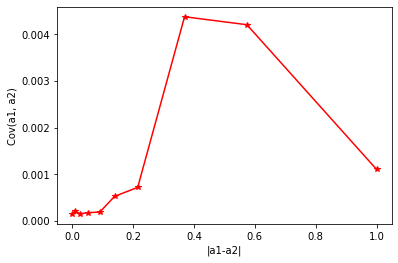

(array([ 3.,  5.,  7., 11.,  5.,  2.,  4.,  1.,  1.,  1.]),
 array([-0.34830517, -0.26753637, -0.18676758, -0.10599879, -0.02523   ,
         0.05553879,  0.13630758,  0.21707638,  0.29784516,  0.37861395,
         0.45938274], dtype=float32),
 <a list of 10 Patch objects>)

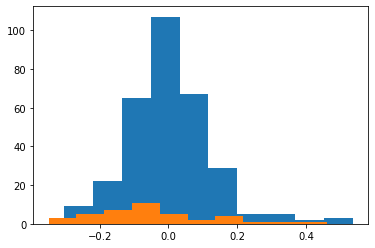

In [11]:
def reject_outliers(data, m = 1.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]
def reject_outliers2(data, m=0.2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def mean(dat):
    return np.mean(dat)
    
def std(dat):
    return np.std(dat)
    
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

with open("../data/celeba/svariance2_width=3_debug.pkl", "rb") as f:
    covmat, embs, arm_accs = pickle.load(f)
    arm_accs = np.array(arm_accs)
    
    idxs = np.where(~np.isnan(arm_accs) )[0]
    idxs1 = np.where(arm_accs[idxs] > 0.8)[0]
    idxs2 = np.where(arm_accs[idxs] <= 0.5)[0]
    covmat = np.linalg.cholesky(covmat[0][idxs, :][:, idxs] + 1e-5*np.eye(len(idxs)))
    
    pca = PCA(n_components=2)
    pca_x = pca.fit_transform(embs[idxs])
    
    print (np.shape(embs))
    _norms = np.linalg.norm(embs, axis=-1)**2
#     ks = np.expand_dims(_norms, axis=-1) + np.expand_dims(_norms, axis=0) -2*np.matmul(embs, np.transpose(embs))
    ks = np.matmul(embs, np.transpose(embs))
    ks = ks[idxs, :][:, idxs]
    ks = np.reshape(ks, [-1])
    ks = np.reshape(covmat, [-1])
    acc_diffs = np.reshape(np.abs(arm_accs[idxs, None] - arm_accs[idxs]), [-1])
    print (len(ks), len(acc_diffs))
    sidxs = np.argsort(acc_diffs)
xs, ys = [], []
y_errs = []
sep = 1e-1
for _ in np.arange(0, 1., sep):
    _ln = len(acc_diffs)
    
    _idxs = np.arange(_ln)[int(_ln*_): int(_ln*(_+sep))]
    xs.append(np.max(acc_diffs[sidxs][_idxs]))
#     _idxs = [_idx for _idx in range(len(sidxs)) if acc_diffs[sidxs][_idx]>_ and acc_diffs[sidxs][_idx]<=_+sep]
#     xs.append(_+sep)
    ys.append(np.mean(ks[sidxs][_idxs]))
    y_errs.append(std(ks[sidxs][_idxs]))
# plt.errorbar(xs, ys, y_errs)
plt.plot(xs, ys, "r-*")
plt.xlabel("|a1-a2|")
plt.ylabel("Cov(a1, a2)")
plt.show()

plt.hist(pca_x[idxs1, 0])
plt.hist(pca_x[idxs2, 0])

In [12]:
from sklearn.linear_model import LinearRegression
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import celeba
import cocos3
    
with open("../data/cocos3/svariance2_width=3_debug.pkl", "rb") as f:
#     arms = celeba.D
    arms = cocos3.D
    covmat, embs, arm_accs = pickle.load(f)
    idxs = np.where(~np.isnan(arm_accs))[0]
    arm_accs = np.array(arm_accs)
    reg = LinearRegression(fit_intercept=False).fit(embs[idxs], arm_accs[idxs])
    print (reg.score(embs[idxs], arm_accs[idxs]))
    
    reg = LinearRegression(fit_intercept=False).fit(arms[idxs], arm_accs[idxs])
    print (reg.score(arms[idxs], arm_accs[idxs]))
    
    bad_idx = np.where(arm_accs==0)[0][1]
    print (arms[bad_idx], arm_accs[bad_idx])
    x = covmat[0][bad_idx, :]
    k = 0
    for close_idx in np.argsort(-x):
        if not np.isnan(arm_accs[close_idx]):
            print (arms[close_idx], arm_accs[close_idx])
            k += 1
            if k >= 10:
                break

Arms shape:  (4096, 12) [0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1 1 1]
Arms shape:  (320, 6) [0 0 0 0 0 0] [9 1 1 1 1 1]
{154: 177, 147: 177, 125: 125, 144: 125, 143: 125, 146: 125, 139: 125, 148: 125, 124: 125, 135: 125, 110: 125, 158: 125, 153: 125, 159: 125, 126: 125, 134: 125, 161: 125, 149: 125, 181: 125, 141: 125, 162: 125, 133: 125, 93: 125, 118: 125, 128: 125, 96: 125, 168: 125, 123: 125, 156: 156, 105: 156, 163: 163, 98: 163, 112: 163, 145: 163, 137: 163, 95: 163, 127: 163, 150: 163, 165: 163, 157: 163, 94: 163, 122: 122, 160: 122, 129: 122, 106: 122, 132: 122, 107: 122, 155: 122, 97: 122, 164: 122, 109: 122, 111: 122, 180: 122, 179: 122, 131: 122, 142: 122, 99: 122, 138: 122, 114: 122, 115: 122, 113: 122, 117: 122, 116: 122, 100: 122, 101: 122, 102: 122, 172: 122, 171: 122, 174: 122, 170: 122, 175: 122, 173: 122}
0.08077559930924072
-3.2438082388705265


IndexError: index 1 is out of bounds for axis 0 with size 0